In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## Group ID: 1

- 504191564 - Harun Uz
- 504191570 - Zeynep Betül Arslanbenzer
- 504201585 - Hızır Can Bayram
- 504192517 - Eda Çapa Kızıltaş
- 504191529 - Murat Özkök

## Impact of Clustering on Local Efficiency in Social Networks

# I.

### 1.

**G1 nodes are Deezer users from European countries and edges are mutual follower relationships between them.**
- Undirected
- Binary
- Node and edge statistics:
    - Nodes = 28,281
    - Edges = 92,752
    - Node Degree
        - Mean = 6.56 
        - Standard Deviation = 7.946

**G2 nodes are LastFM users from Asian countries and edges are mutual follower relationships between them.**
- Undirected
- Binary
- Node and edge statistics:
    - Nodes = 7,624
    - Edges = 27,806
    - Node Degree
        - Mean = 7.29 
        - Standard Deviation = 11.45

In [2]:
def read_edges_and_create_graph(edge_file_path):
    """
    Reads the edge.csv file, parses the data, creates the networkx.Graph and returns it.
    """
    with open(edge_file_path, 'r') as edge_file:
        lines = edge_file.readlines()
    
    # first line is "node1, node2", so ignore the line starting with'n'
    return nx.parse_edgelist(lines, comments='n', delimiter=',')

In [3]:
g1_edge_file_path = "./data/deezer_europe/deezer_europe_edges.csv"
g2_edge_file_path = "./data/lasftm_asia/lastfm_asia_edges.csv"

In [4]:
G1 = read_edges_and_create_graph(g1_edge_file_path)
G2 = read_edges_and_create_graph(g2_edge_file_path)

In [5]:
# assign data of lists.  
data = {'Node': [G1.number_of_nodes(), G2.number_of_nodes()], 'Edge': [G1.number_of_edges(), G2.number_of_edges()]}  

# Create DataFrame  
df = pd.DataFrame(data,  index =['G1 (Deezer)', 'G2 (LastFM)'])
print(df)

              Node   Edge
G1 (Deezer)  28281  92752
G2 (LastFM)   7624  27806


### 2.

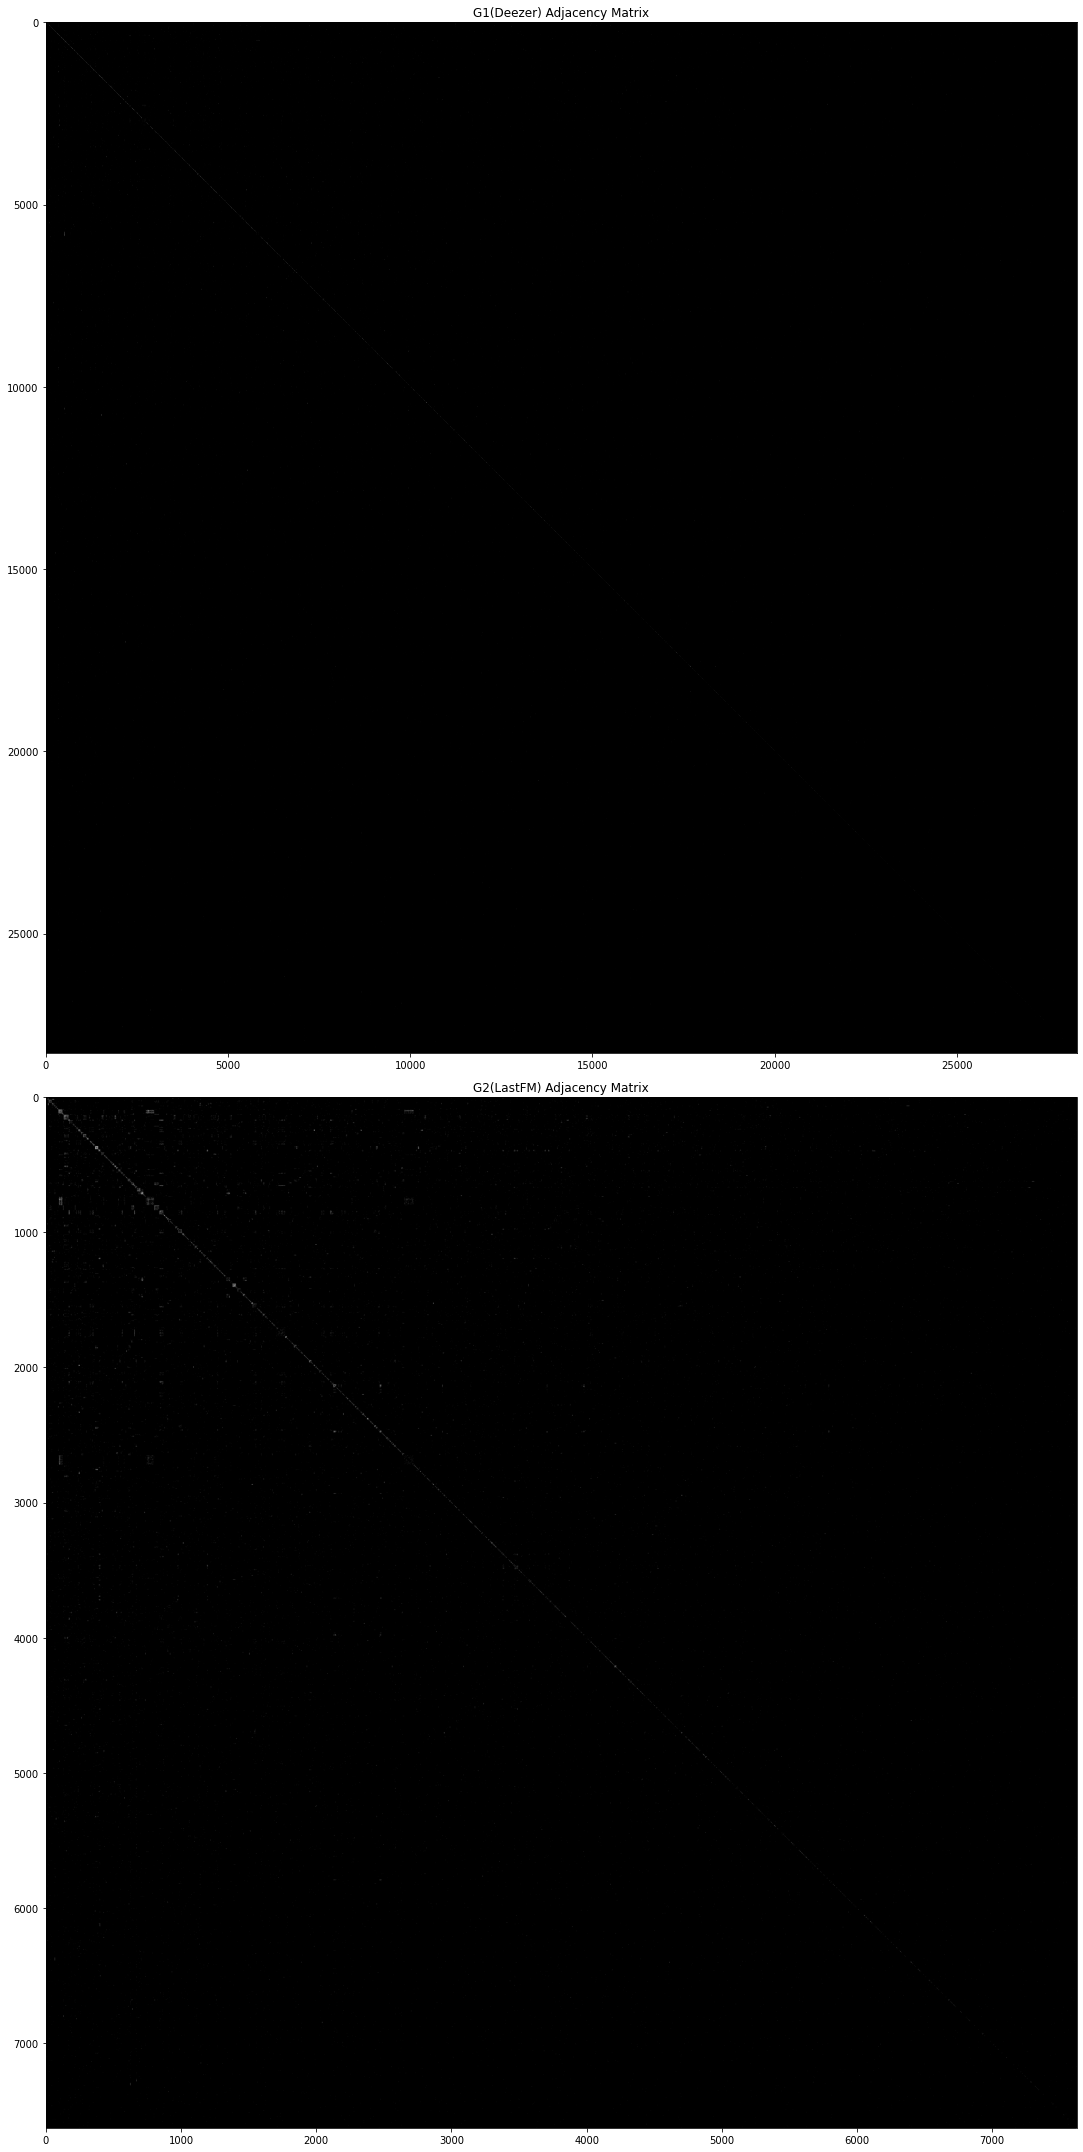

In [13]:
# create data
x=np.array([1, 2, 3, 4, 5])
  
# making subplots
fig, ax = plt.subplots(2,1, figsize=(30,30))
  
# set data with subplots and plot
ax[0].imshow(adj_G1, cmap="gray") 
ax[1].imshow(adj_G2, cmap="gray")
  
# set the title to subplots
ax[0].set_title("G1(Deezer) Adjacency Matrix")
ax[1].set_title("G2(LastFM) Adjacency Matrix")

# set spacing
fig.tight_layout()
plt.show()

Adjacency matrix views at different scales

<img src="pngs/g1_g2_original.gif" width="1080" align="center">

## 3.

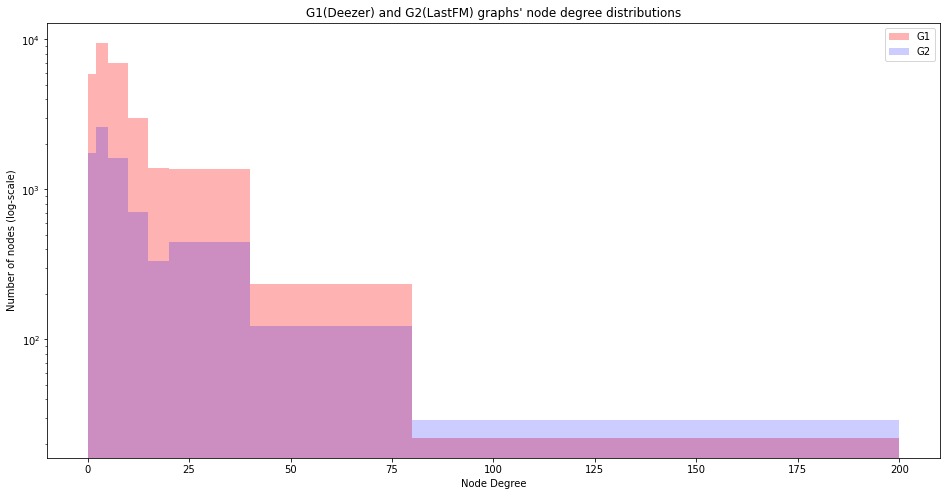

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

bins1 = [0, 2, 5, 10, 15, 20, 40, 80, 200]
ax.hist(G1_node_degree, alpha=0.3, bins=bins1, color='red',  log=True)
ax.hist(G2_node_degree, alpha=0.2, bins=bins1, color='blue', log=True)

ax.set_title(f"G1(Deezer) and G2(LastFM) graphs' node degree distributions")
ax.set_ylabel(f"Number of nodes (log-scale)")
ax.set_xlabel(f"Node Degree")

ax.legend(['G1', 'G2'], loc=1)
plt.show()


#  II. Impact of Clustering on Local Efficiency in Social Networks

## 1.

##### Local Efficiency: $$E_{loc(i)} = \dfrac{1}{N_{G_i}(N_{G_i} - 1)}\sum_{j,h \in G{i}}\dfrac{1}{l_{jh}} $$
   
   
   where $G_{i}$ is the subgraph consisting immediate neighbors of $i^{th}$ node, except $i^{th}$ itself. j & h are all possible pairwise node combinations between subgraph nodes. $N_{G_i}$ is the node number of subgraph and $l_{jh}$ is the shortest path distance between nodes i & j.
  
  Local efficiency is indication for efficiency in information transfer among the immediate neighbors of $i^{th}$ node when $i^{th}$ node is removed. 
  
  High local efficiency of a node suggests densely sharing information within existing communities. The more nodes with high local efficiency the more tendency to segregated information processing in network. [1]

  The local efficiency is approximate estimate for integration between nodes and their immediate neighbors (node & neighbourhood information transfer) through entire network. Stated in other words, average local efficiency provide an indicative metric about resiliency towards fault by representing efficiency in continuity of information transfer between the neighbors of a node when the node is disrupted. 
  
##### Clustering Coefficient: $$ C_{i} = \dfrac{2t_i}{k_i(k_i - 1)} \quad (C_{i} = 0 \quad for \quad k_i<2 )$$
  
  where $k_i$ is the degree of node i and $t_i=\sum_{j,k}A_{ij}A_{jk}A_{ki}$ is the number of closed triangles around node i. This is ratio of connected pairwise neighbors to potential (maximum) number of i’s neighbors pairs. In other words, the fraction between triangles around a node to degree of the node is named as the clustering coefficient.
  
  <img src="pngs/clusteringCoeff2.png" alt="Drawing" style="width: 100px;"/>
  
  It is ratio of a node's neighbors that are also immediate neighbors of each other (triangular motif frequency around node). [2]
  
 
  Clustering coefficient is a measure for node tendency to clustering. Moreover, clustering is probe for the existence of structural holes in a network, which are missing links between neighbors, that is bad or good according to type of network and function of node.
  
  Clustering coefficient is related with cliqueness and is resulted from the ratio between the actual number of transitive clusters (or closed triads) and the total possible number of transitive and intransitive clusters
(or open triads) in a system

  
   <img src="pngs/Illustration-of-Structural-Hole-Concept.png" alt="Drawing" width=500px/> 
   
   Figure from [3].
  
  Clustering coefficient (network-wide clustering coefficient) reflects generality of clustered connectivity for individual nodes. 
  As seen from formula, the lower the degree the higher the clustering coefficient, furthermore lower degree nodes have more effect on the average clustering coefficient  
   
  A clique would come with local clustering coefficient equal to 1
  
  <img src="pngs/Clustering-Coefficient-A-Node-V.png" alt="Drawing" style="width: 100px;"/>
  
  Figure from [5].
  

## 2.

Generate small graphs using Watts-Strogatz model.

In [50]:
numberOfNetworks = 10
numberOfNodes = 1000
numberOfEdges = 20
localEfficiencyList = []
globalEfficiencyList = []
avarageClusteringList = []
possibilityList = []

def generateSmallGraphs():
    
    for i in range(numberOfNetworks):
        # random rewiring posibility [0, 1.0]
        possibility = i / (numberOfNetworks)
        possibilityList.append(possibility)
        
        # randomly rewire the graph according to Watts-Strogatz graph
        # possibility=1 indicates a purely random rewiring and 0 indicates a small world graph
        G = nx.watts_strogatz_graph(numberOfNodes, numberOfEdges, possibility)
        
        # compute efficiency and clustering measures
        localEfficiency = nx.algorithms.efficiency_measures.local_efficiency(G)
        
        globalEfficiency = nx.algorithms.efficiency_measures.global_efficiency(G)
        
        avarageClustering = nx.algorithms.cluster.average_clustering(G)
        
        # append to lists
        localEfficiencyList.append(localEfficiency)
        globalEfficiencyList.append(globalEfficiency)        
        avarageClusteringList.append(avarageClustering)
        
generateSmallGraphs()

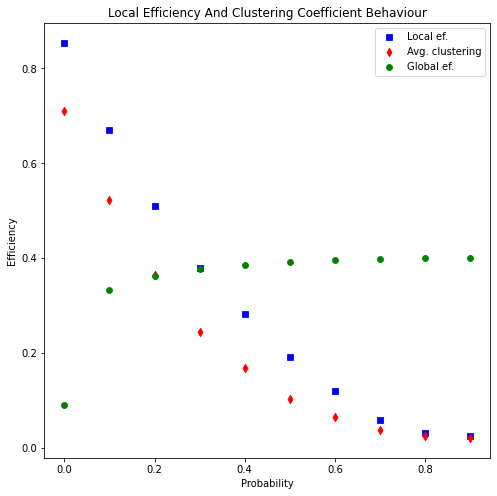

In [53]:
# plot the efficiency and clustering measures
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(possibilityList, localEfficiencyList, c="blue", marker='s', linewidths=.8)
ax.scatter(possibilityList, avarageClusteringList, c="red", marker='d', linewidths=.8)
ax.scatter(possibilityList, globalEfficiencyList, c="green", marker='o', linewidths=.8)
ax.set_title('Local Efficiency And Clustering Coefficient Behaviour')

plt.legend(["Local ef." , "Avg. clustering", "Global ef."])
plt.xlabel("Probability")
plt.ylabel("Efficiency")
plt.show()

  <img src="pngs/clusteringCoeffvsRandomness.png" alt="Drawing" width='640px'/>
  Figure from [6].
  
    As randomness increases, the clustering coefficient decreases logaritmically (short path length is a characteristic of random networks, whereas high clustering is a property of lattice networks). [4]

## 3.

The clustering coefficient is related with the direct connections between the immideate neighbors of a node. However, both indirect paths (pathway between i & j node with multiple hops) and direct connections are considered by local efficiency. This can be seen from the mathematical representations of both properties. In both equations the normalizing factor (denominator) is the number possible connections between the neighbors of node i. The numerator is the reciprocal of shortest path length between all the neighbors for local efficiency, and the number of triads in the neighbors for clustering coefficient.

$N_{G_i} = k_i = $ degree of node *i*.
  
  In this way, local efficiency can be considered a generalization of the clustering coefficient that explicitly takes into account paths.
  
  An example for a simple social graph can be seen below.
  
  <img src="pngs/gkarate.png" alt="Drawing" width=700px/>
  
  For the node 4,

Local efficiency:
$$N_{G_4} = 3$$
$$\sum_{j,h \in G{i}}\dfrac{1}{l_{jh}} = \frac{1}{1} + \frac{1}{1} + \frac{1}{1} + \frac{1}{1} + \frac{1}{2} + \frac{1}{2}$$
$$E_{loc(4)} = \dfrac{1}{N_{G_4}(N_{G_4} - 1)}\sum_{j,h \in G{4}}\dfrac{1}{l_{jh}} = 0.83$$
Clustering coefficient:
$$k_4 = 3$$
$$t_4=\sum_{j,k}A_{4j}A_{jk}A_{k4} = 2$$

$$C_{4} = \dfrac{2t_4}{k_4(k_4 - 1)} = \frac{2}{3} = 0.66$$

# III.

As the total number of triads of i'th node's neighbors **increases**, the shortest path length between the neigbor decreases and the local efficiency **increases**, and vice versa. This indicates that there is a **linear relationship** between clustering coefficient and the local efficiency. In social networks, nodes are clustered together possibly representing a community and the local efficiency is usually high. Random graphs exhibit a small average shortest path length. However, rewiring edges randomly breaks the clustering and increases the shortest path between immediate neighbors resulting in a low local efficiency.

In this section we investigate the clustering coefficient and local efficiency for G1, G2 and random graph simulations derived from G1 and G2. We simulate 200 random graphs. 100 of them have the same node degree with G1 and the other 100 have the same node degree with G2.

#### Graph simulation

Simulated graphs have the same node degree distribution as the original graphs. Networkx can generate a random graph for a given node degree distribution. However, the resulting graph may end up being **a multigraph** (there might be multiple edges between two nodes with a low probability). For the sake of simplicity, we remove the multiple edges between any pair of two nodes. Therefore, simulated graphs have exactly **the same** number of **nodes** and **at most** as many **edges** as the original graphs.

Hyperparameter setting

In [16]:
n1 = 100  # number of simulation graphs derived from G1
n2 = 100  # number of simulation graphs derived from G2

In [17]:
# get the node degrees for each node in graphs
degrees_g1 = [val for (node, val) in G1.degree()]
degrees_g2 = [val for (node, val) in G2.degree()]

Simulate the graphs

In [18]:
simulated_g1 = []
simulated_g2 = []

simulated_degrees_g1 = []
simulated_degrees_g2 = []

print(f"Generating random graphs derived from G1...")
for i in range(n1):
    new_g = nx.Graph(nx.generators.degree_seq.configuration_model(degrees_g1))
    simulated_g1.append(new_g)
    # get the node degrees
    simulated_degrees_g1.append([val for (node, val) in new_g.degree()])

print(f"Generating random graphs derived from G2...")
for i in range(n2):
    new_g = nx.Graph(nx.generators.degree_seq.configuration_model(degrees_g2))
    simulated_g2.append(new_g)
    # get the node degrees
    simulated_degrees_g2.append([val for (node, val) in new_g.degree()])

print(f"n1={n1} and n2={n2} graphs are generated with the same node distribution as G1 and G2 respectively.")

Generating random graphs derived from G1...
Generating random graphs derived from G2...
n1=100 and n2=100 graphs are generated with the same node distribution as G1 and G2 respectively.


#### Plot the node degree distribution for G1, G2 and simulated graphs

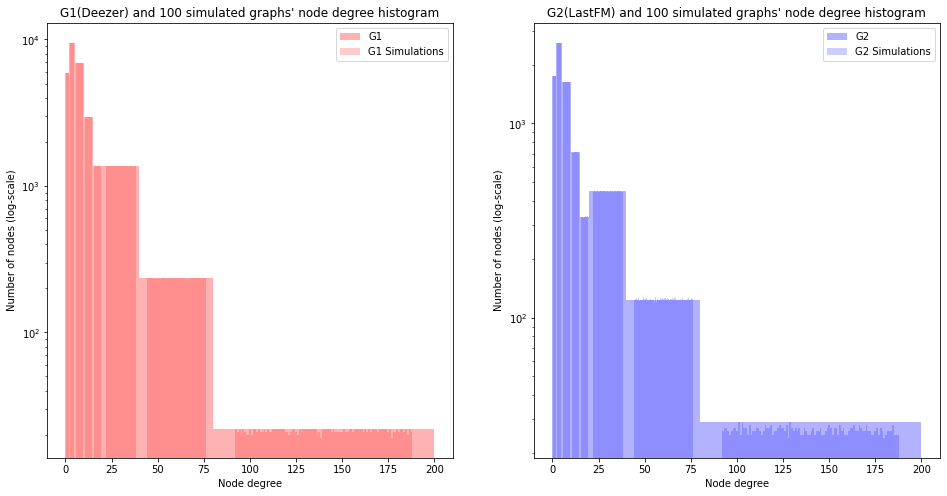

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
ax1, ax2 = axs

bins1 = [0, 2, 5, 10, 15, 20, 40, 80, 200]
ax1.hist(degrees_g1, alpha=0.3, bins=bins1, color='red', label='G1', log=True)
ax1.hist(simulated_degrees_g1, alpha=0.2, bins=bins1, label='G1 Simulations', color=['red']*n2, log=True)
ax1.set_title(f"G1(Deezer) and {n1} simulated graphs' node degree histogram")
ax1.set_ylabel(f"Number of nodes (log-scale)")
ax1.set_xlabel(f"Node degree")
ax1.legend(loc='upper right')

bins2 = [0, 2, 5, 10, 15, 20, 40, 80, 200]
ax2.hist(degrees_g2, bins=bins2, alpha=0.3, color='blue', label='G2', log=True)
ax2.hist(simulated_degrees_g2, bins=bins2,  alpha=0.2, label='G2 Simulations',color=['blue']*n2, log=True)
ax2.set_title(f"G2(LastFM) and {n2} simulated graphs' node degree histogram")
ax2.set_ylabel(f"Number of nodes (log-scale)")
ax2.set_xlabel(f"Node degree")
ax2.legend(loc='upper right')

plt.show()

Compute the clustering coefficient and local efficiency for G1, G2 and simulated graphs

In [25]:
print(f"Computing clustering coefficient and local efficiency for G1 and G2...")
cc_g1 = nx.algorithms.cluster.average_clustering(G1)
le_g1 = nx.algorithms.efficiency_measures.local_efficiency(G1)

cc_g2 = nx.algorithms.cluster.average_clustering(G2)
le_g2 = nx.algorithms.efficiency_measures.local_efficiency(G2)

cc_simulated_g1, le_simulated_g1 = [], []
cc_simulated_g2, le_simulated_g2 = [], []

print("\nComputing clustering coefficient and local efficiency for G1 simulations")
for i, g_ in enumerate(simulated_g1):
    cc_simulated_g1.append(nx.algorithms.cluster.average_clustering(g_))
    le_simulated_g1.append(nx.algorithms.efficiency_measures.local_efficiency(g_))
    
    if i % (n1 // 4) == 0:
        print(f"Calculating properties... {i+1}/{n1}")

print("\nComputing clustering coefficient and local efficiency for G2 simulations")
for i, g_ in enumerate(simulated_g2):
    cc_simulated_g2.append(nx.algorithms.cluster.average_clustering(g_))
    le_simulated_g2.append(nx.algorithms.efficiency_measures.local_efficiency(g_))
    
    if i % (n2 // 4) == 0:
        print(f"Calculating properties... {i+1}/{n1}")
print(f"Finished!")

Computing clustering coefficient and local efficiency for G1 and G2...

Computing clustering coefficient and local efficiency for G1 simulations
Calculating properties... 1/100
Calculating properties... 26/100
Calculating properties... 51/100
Calculating properties... 76/100

Computing clustering coefficient and local efficiency for G2 simulations
Calculating properties... 1/100
Calculating properties... 26/100
Calculating properties... 51/100
Calculating properties... 76/100
Finished!


In [31]:
print(f"\t\t\t\tG1\tG2")
print(f"Clustering Coefficient\t\t{cc_g1:.3f}\t{cc_g2:.3f}")
print(f"Local Efficiency\t\t{le_g1:.3f}\t{le_g2:.3f}")

				G1	G2
Clustering Coefficient		0.141	0.219
Local Efficiency		0.171	0.284


#### Plot the G1, G2 and simulated graphs in R space

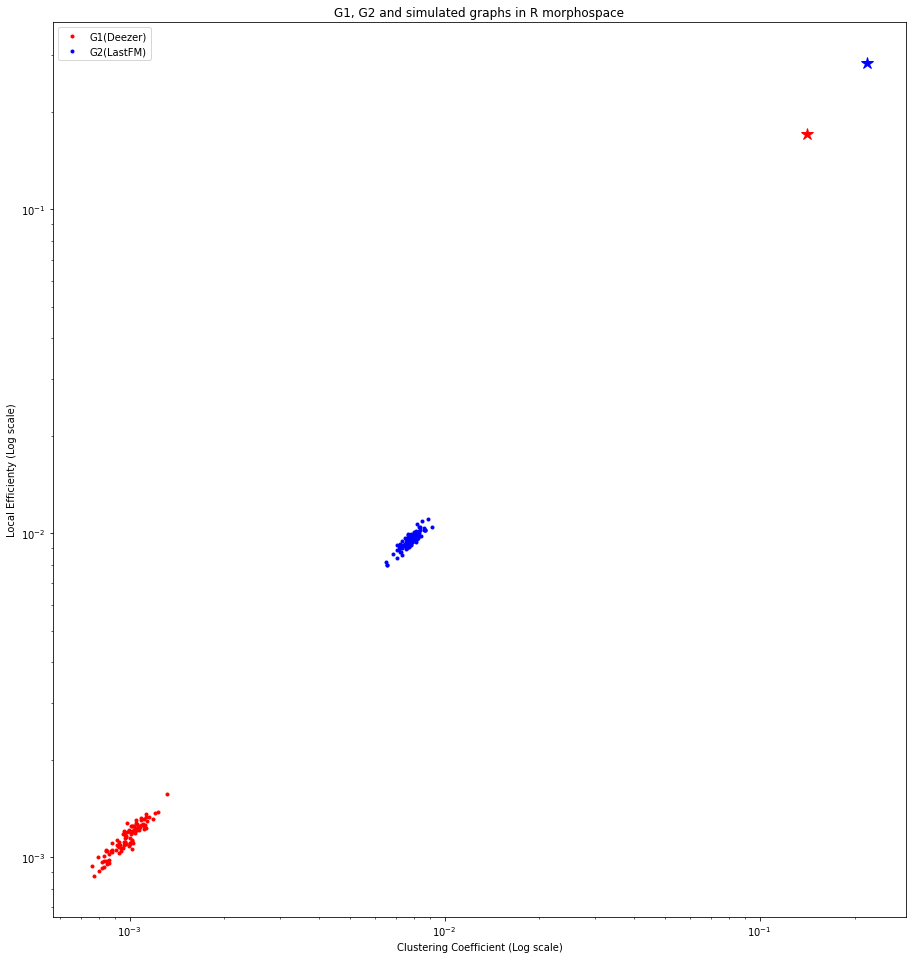

In [48]:
labels = ["G1(Deezer)", "G2(LastFM)"]

ds = {
    "G1(Deezer)": (cc_simulated_g1, le_simulated_g1, cc_g1, le_g1, 'red'),
    "G2(LastFM)": (cc_simulated_g2, le_simulated_g2, cc_g2, le_g2, 'blue')
}

fig, ax = plt.subplots(figsize=(16, 16))

for label in labels:
    ccs, les, cc, le, color = ds[label]
    ax.plot(ccs, les, marker='.', linestyle='', color=color, label=label)
    ax.plot(cc, le, marker='*', ms=12.0, color=color, linestyle='')

ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Clustering Coefficient (Log scale)")
ax.set_ylabel("Local Efficienty (Log scale)")
ax.set_title("G1, G2 and simulated graphs in R morphospace")
ax.legend(loc='upper left')

fig.tight_layout()
fig.subplots_adjust(bottom=0.2,left=0.25)
fig.savefig("./r_space.png", dpi=300, bbox_inches='tight', facecolor='white')

## IV.

Local efficiency and clustering coefficient have a linear relationship as we described in Section III.

Both G1 and G2 have high clustering coefficient and local efficiency as expected. G2 has higher clustering coefficient and local efficiency due to the smaller number of nodes.

Simulated graphs have lower clustering coefficient and local efficiency compared to the anchor graphs. Even though the simulated graphs are derived from the anchor graphs and have the same node degree/strength distribution, the random rewiring of the edges decreases both clustering coefficient and local efficiency.

In conclusion, the existence of many clusters in a network affects local information flow positively, since within these clusters nodes are densely connected and the shortest path lengths are small. Our results show that even though the number of nodes can be high in social networks, the local efficiency is also high due to the existence of many small clusters.

### References

1. Stanley, Matthew L., et al. "Changes in brain network efficiency and working memory performance in aging." PLoS One 10.4 (2015): e0123950.
2. Watts, D.J., Strogatz, S.H., 1998. Collective dynamics of ‘small-world’ networks. Nature 393, 440–442.
3. Hearnshaw, Edward JS, and Mark MJ Wilson. "A complex network approach to supply chain network theory." International Journal of Operations & Production Management (2013).
4. Watts DJ, Strogatz SH (1998) Collective dynamics of “small-world” networks. Nature 393: 440–442. 10.1038/30918
5. Pavlopoulos, Georgios A., et al. "Using graph theory to analyze biological networks." BioData mining 4.1 (2011): 1-27.
6. Hearnshaw, Edward JS, and Mark MJ Wilson. "A complex network approach to supply chain network theory." International Journal of Operations & Production Management (2013).